In [1]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector 
from readsql import queryToDataFrame,showTables,DescribeTable



ModuleNotFoundError: No module named 'dotenv'

In [28]:
import os 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from dotenv import load_dotenv

load_dotenv() 

ModuleNotFoundError: No module named 'pandas'

In [29]:
connection = mysql.connector.connect(host='localhost',
                                      user='root',
                                      password='1723',
                                      database='swiftmarket')

NameError: name 'mysql' is not defined

In [30]:
host = os.getenv('HOST')
username = os.getenv('USER')
password = os.getenv('PASSWORD')

In [31]:
connection.is_connected()

NameError: name 'connection' is not defined

In [32]:
connection = mysql.connector.connect(host=host,
                                     user=username,
                                     password=password,
                                     database='swiftmarket')

cursor = connection.cursor()

NameError: name 'mysql' is not defined

In [33]:
query = """show tables;"""
cursor.execute(query)

NameError: name 'cursor' is not defined

In [34]:
cursor.fetchall()

NameError: name 'cursor' is not defined

In [35]:
rows = cursor.fetchall()
rows

NameError: name 'cursor' is not defined

#fetch firstname and email id 

In [36]:
query = """select customerid,firstname,email
from customers;"""
cursor.execute(query)
rows = cursor.fetchall()
df = pd.DataFrame(data=rows,columns=cursor.column_names)
df.head()

NameError: name 'cursor' is not defined

#select category name and total sales 

In [37]:
query = """SELECT c.categoryname,sum(s.totalprice) as TotalSales
from salesdata s 
inner join subcategories sb 
on s.subcatid = sb.subcatid
inner join categories c
on sb.categoryid = c.categoryid
group by c.categoryname;"""

df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [38]:
df.head()

NameError: name 'df' is not defined

In [39]:
x_val = df['categoryname'].values

NameError: name 'df' is not defined

In [40]:
df['TotalSales'] = df['TotalSales'].astype(float)

NameError: name 'df' is not defined

In [41]:
plt.figure(figsize=(12,5))
plt.title('top categories based on annual sales')
plt.bar(df['categoryname'].values,height=df['TotalSales'].values)


for i in range(len(df['categoryname'])):
    plt.annotate(xy=(i,df['TotalSales'].values[i]),
                 text = df['TotalSales'].values[i],
                 horizontalalignment='center')

plt.xticks(rotation=90)
plt.savefig('annualsales-categories.jpeg')
plt.show()

NameError: name 'plt' is not defined

1 Provide a visual representation of our annual sales performance over time?

In [42]:
query = """SELECT monthname(saledate) as month , SUM(TotalPrice) AS total_sales
FROM salesdata
GROUP BY monthname(saledate),month(saledate)
ORDER BY  month(saledate) asc ;"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [43]:
df.head()

NameError: name 'df' is not defined

In [44]:
x_val = df['month'].values

NameError: name 'df' is not defined

In [45]:
y_val = df['total_sales'].values

NameError: name 'df' is not defined

In [46]:
plt.figure(figsize=(12,5),facecolor='pink')
plt.title('annual sales performance ',color= 'red',pad=20,fontweight='bold')
plt.plot(x_val,y_val,
         linestyle='solid',
       linewidth=4,
        color='blue',marker='o')


for i in range(len(df['month'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center')
    

#plt.legend
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

#2. The client is interested in understanding how the sales have been fluctuating
over time to identify any underlying patterns or anomalies Analyze the trend in
our monthly sales using a moving average technique

#3 Explore the month-over-month growth rate in sales.

#4 identify the top-performing sales representatives based on their total sales volume 

In [47]:
query = """SELECT
    s.employeeid,
    e.firstname,
    SUM(s.totalprice) AS total_sales
FROM
    salesdata s
JOIN
    employees e ON s.employeeid = e.employeeid
GROUP BY
    s.employeeid, e.firstname
ORDER BY
    total_sales DESC
LIMIT 10 ;"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [48]:
df.head()

NameError: name 'df' is not defined

In [49]:
x_value = df['firstname'].values 

NameError: name 'df' is not defined

In [50]:
y_value = df['total_sales'].values 

NameError: name 'df' is not defined

In [15]:
plt.figure(figsize=(12,5),facecolor='pink')
plt.title('top-performing sales representatives')
plt.bar(x_value,height=y_value,color='blue',edgecolor='black')


for i in range(len(df['firstname'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

#5. What are the total sales made by each employee?

In [51]:
query = """SELECT
    s.employeeid,
    e.firstname,
    SUM(s.totalprice) AS total_sales
FROM
    salesdata s
JOIN
    employees e ON s.employeeid = e.employeeid
GROUP BY
    s.employeeid, e.firstname
ORDER BY
    total_sales DESC; """

In [52]:
df.head()

NameError: name 'df' is not defined

#6 Which category has the highest total sales?

In [53]:
query = """SELECT c.categoryname, sc.subcatname, SUM(s.TotalPrice) AS total_sales
FROM categories c
JOIN subcategories sc ON c.categoryid = sc.categoryid
JOIN salesdata s ON sc.subcatid = s.subcatid
GROUP BY c.categoryname, sc.subcatname
ORDER BY total_sales DESC;
"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [54]:
df.head()

NameError: name 'df' is not defined

In [55]:
x_val1 = df['categoryname'].values

NameError: name 'df' is not defined

In [56]:
y_val1 = df['total_sales'].values

NameError: name 'df' is not defined

In [57]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('highest total-sales category')
plt.bar(x_val1,height=y_val1,color='blue')


for i in range(len(df['categoryname'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

#7. How many customers are there in each state?

In [58]:
query = """SELECT state, COUNT(DISTINCT customerid) AS number_customers
FROM customers
GROUP BY state;"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [59]:
x_val2 = df['state'].values

NameError: name 'df' is not defined

In [60]:
y_val2 = df['number_customers'].values

NameError: name 'df' is not defined

In [26]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('customers in each state')
plt.bar(x_val2,height=y_val2,color='blue')


for i in range(len(df['state'])):
    plt.annotate(xy=(i,df['number_customers'].values[i]),
                 text = df['number_customers'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

#8. What is the average quantity of each product sold?

In [61]:
query = """SELECT Subcatname, AVG(unitprice) AS avg_quantity_sold
FROM subcategories
GROUP BY subcatname
limit 10 ;"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [62]:
df.head()

NameError: name 'df' is not defined

In [63]:
x_val3 = df['Subcatname'].values

NameError: name 'df' is not defined

In [64]:
y_val3 = df['avg_quantity_sold'].values

NameError: name 'df' is not defined

In [65]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('average quantity of product sold')
plt.bar(x_val3,height=y_val3,color='blue')


for i in range(len(df['Subcatname'])):
    plt.annotate(xy=(i,df['avg_quantity_sold'].values[i]),
                 text = df['avg_quantity_sold'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

#9Which supplier has the highest total sales?

In [66]:
query = """SELECT sup.SupplierName, SUM(p.UnitPrice * s.Quantity) AS TotalSales
FROM salesdata s
JOIN subcategories p ON s.subcatID = p.SubcatID
JOIN suppliers sup ON p.SupplierID = sup.SupplierID
GROUP BY sup.SupplierID
ORDER BY TotalSales DESC
LIMIT 1;
"""
supplier_highest_sales = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [67]:
supplier_highest_sales

NameError: name 'supplier_highest_sales' is not defined

#10 What is the total revenue generated from sales in each state?

In [68]:
query = """SELECT state, SUM(TotalPrice) AS total_revenue
FROM salesdata sd 
join customers c on sd.CustomerID = c.CustomerID
GROUP BY state;"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [46]:
df.head()

,state,total_revenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00


assam has the highest sales 

In [69]:
x_val4 = df['state'].values

NameError: name 'df' is not defined

In [70]:
y_val4 = df['total_revenue'].values

NameError: name 'df' is not defined

In [71]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('total sales generated from each state')
plt.bar(x_val4,height=y_val4,color='blue')

for i in range(len(x_val4)):
    plt.text(x=i, y=y_val4[i], s=y_val4[i], ha='center', va='bottom', fontsize=6)


plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

#11How many sales were made by each customer

In [72]:
query = """SELECT CustomerID, COUNT(*) AS total_sales
FROM salesdata
GROUP BY CustomerID;
"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [73]:
df

NameError: name 'df' is not defined

#12What is the total salary expenditure on employees in each department

In [74]:
query = """SELECT Department, SUM(Salary) AS TotalSalaryExpenditure
FROM Employees
GROUP BY Department;"""
df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [75]:
df.head()

NameError: name 'df' is not defined

In [76]:
x_val5 = df['Department'].values

NameError: name 'df' is not defined

In [77]:
y_val5 = df['TotalSalaryExpenditure'].values

NameError: name 'df' is not defined

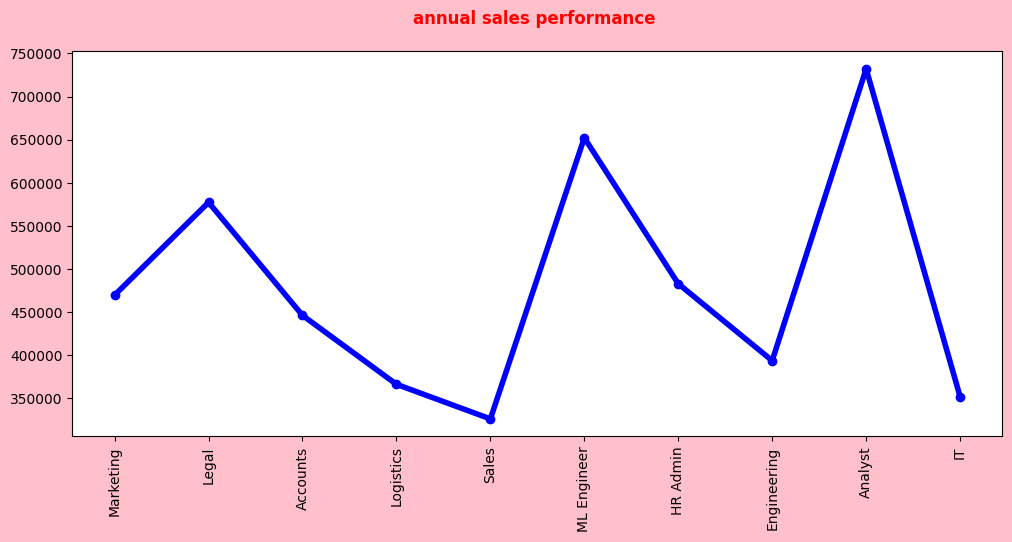

In [56]:
plt.figure(figsize=(12,5),facecolor='pink')
plt.title('annual sales performance ',color= 'red',pad=20,fontweight='bold')
plt.plot(x_val5,y_val5,
         linestyle='solid',
       linewidth=4,
        color='blue',marker='o')


    

#plt.legend
plt.xticks(rotation=90)
plt.show()

#13. Which subcategory has the highest average unit price?

In [78]:
query = """SELECT Subcatname, AVG(UnitPrice) AS AverageUnitPrice
FROM subcategories
GROUP BY Subcatname
ORDER BY AverageUnitPrice DESC
LIMIT 3;
"""

df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [79]:
df

NameError: name 'df' is not defined

In [80]:
x_val6 = df['Subcatname'].values

NameError: name 'df' is not defined

In [81]:
y_val6 =  df['AverageUnitPrice'].values

NameError: name 'df' is not defined

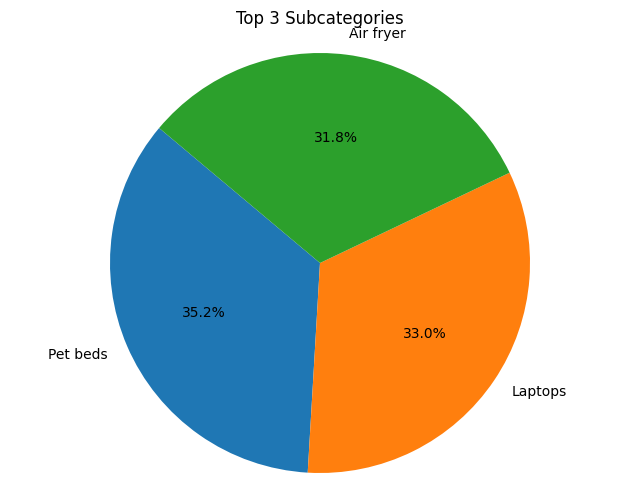

In [61]:

plt.figure(figsize=(8, 6))
plt.pie(y_val6, labels=x_val6, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Subcategories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#14What is the total revenue generated from sales in each category?

In [82]:
query = """SELECT c.CategoryName, SUM(s.Quantity * p.UnitPrice) AS TotalRevenue
FROM salesdata s
JOIN subcategories p ON s.SubcatID = p.SubcatID
JOIN categories c ON p.CategoryID = c.CategoryID
GROUP BY c.CategoryName;"""

df = queryToDataFrame(query)

NameError: name 'queryToDataFrame' is not defined

In [83]:
df 

NameError: name 'df' is not defined